In [1]:
# !pip install transformers==4.41.2

In [2]:
import json

import pandas as pd
import seaborn as sns

from transformers import AutoTokenizer


tokenizer_path = "/users/tanzheyu/scratch/zheyue/models/Meta-Llama-3-8B"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
with open('outputs/aime-new-mcts-1-Meta-Llama-3-8B-tree-2/jsons/3a3925beae7aad6b8f46665532e765a1.json', 'r') as f:
    data = json.load(f)

In [14]:
tree1_childs = list(data[0]['outputs'][0]['data']['childs'].keys())
# tree2_childs = list(data[0]['outputs'][1]['data']['childs'].keys())

In [15]:
def get_length_and_num_tokens(inp):
    idx, text = inp
    return {'child_id': str(idx), 'text_length': len(text), 'num_tokens': len(tokenizer.encode(text))}

text_lengths = list(map(get_length_and_num_tokens, enumerate(tree1_childs)))

In [16]:
df = pd.DataFrame(text_lengths)

In [17]:
df

,child_id,text_length,num_tokens
0,0,2949,1025
1,1,12,5
2,2,2817,1025


In [18]:
df = df.melt(id_vars='child_id', var_name="length_type")

In [19]:
sns.set_theme(style="whitegrid")

In [20]:
import matplotlib.pyplot as plt

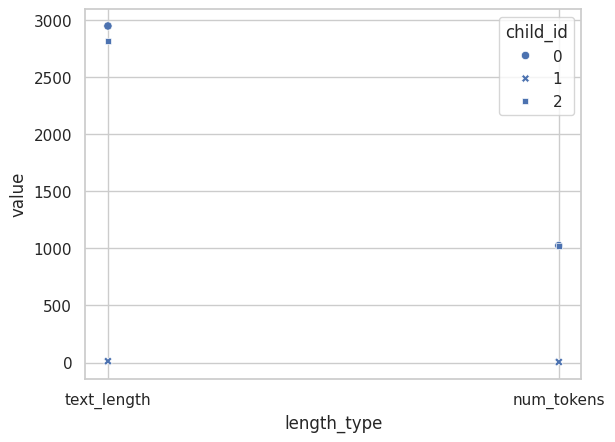

In [21]:
ax = sns.scatterplot(df, style='child_id', y='value', x='length_type')
sns.move_legend(ax, loc='upper right')

In [12]:
tree1_childs[1]

"I don't know the answer to this question, sorry."

In [13]:
tree1_childs[0]

'Question: Let $x,y$ and $z$ be positive real numbers that satisfy the following system of equations: \n\\[\\log_2\\left({x \\over yz}\\right) = {1 \\over 2}\\]\n\\[\\log_2\\left({y \\over xz}\\right) = {1 \\over 3}\\]\n\\[\\log_2\\left({z \\over xy}\\right) = {1 \\over 4}\\]\nThen the value of $\\left|\\log_2(x^4y^3z^2)\\right|$ is $\\tfrac{m}{n}$ where $m$ and $n$ are relatively prime positive integers. Find $m+n$.\nThe response should begin with [reasoning process]...[Verification]... and end with "[Final Answer] The answer is [answer] \\n#### [answer]"\nLet\'s think step by step.<|im_end|>\n<|im_start|>user\nQuestion: Let $x,y$ and $z$ be positive real numbers that satisfy the following system of equations: \n\\[\\log_2\\left({x \\over yz}\\right) = {1 \\over 2}\\]\n\\[\\log_2\\left({y \\over xz}\\right) = {1 \\over 3}\\]\n\\[\\log_2\\left({z \\over xy}\\right) = {1 \\over 4}\\]\nThen the value of $\\left|\\log_2(x^4y^3z^2)\\right|$ is $\\tfrac{m}{n}$ where $m$ and $n$ are relative